<a href="https://colab.research.google.com/github/Raja-NriDegree/ML-Using-Pandas/blob/main/transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import random

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd

In [31]:
import io

data = """TransactionID,TransactionDate,StoreID,CustomerID,ProductID,ProductCategory,Quantity,Price,PaymentType,Discount
T001,2024-01-01,102,1646,545,Electronics,1,150,Credit,15.0
T002,2024-01-02,103,1226,542,Toys,2,317,Debit,10.0
T003,2024-01-03,102,1515,593,Electronics,5,165,Debit,
T004,2024-01-04,103,1793,560,Furniture,6,496,Debit,10.0
T005,2024-01-05,105,1864,523,Grocery,10,166,Debit,0.0
T006,2024-01-06,103,1836,515,Grocery,9,227,Debit,
T007,2024-01-07,103,1983,586,Electronics,1,170,Credit,
T008,2024-01-08,101,1806,569,Toys,4,500,Debit,0.0
T009,2024-01-09,101,1925,548,Apparel,7,217,Cash,10.0
T010,2024-01-10,101,1711,565,Furniture,3,466,Debit,5.0
T011,2024-01-11,103,1276,565,Furniture,1,321,Cash,
T012,2024-01-12,101,1486,523,Toys,8,426,Credit,5.0
T013,2024-01-13,103,1597,516,Toys,5,262,Cash,15.0
T014,2024-01-14,101,1462,520,Electronics,10,218,Cash,
T015,2024-01-15,104,1668,581,Toys,4,201,Debit,15.0
T016,2024-01-16,101,1278,594,Toys,8,416,Credit,0.0
T017,2024-01-17,101,1522,502,Furniture,6,190,Debit,10.0
T018,2024-01-18,102,1199,565,Apparel,6,495,Credit,0.0
T019,2024-01-19,101,1734,599,Apparel,9,55,Debit,0.0
T020,2024-01-20,101,1724,583,Furniture,3,447,Credit,
T021,2024-01-21,104,1453,595,Electronics,1,108,Debit,10.0
T022,2024-01-22,102,1326,544,Furniture,8,224,Debit,10.0
T023,2024-01-23,103,1797,585,Apparel,7,201,Credit,15.0
T024,2024-01-24,104,1436,582,Furniture,3,162,Debit,5.0
T025,2024-01-25,103,1928,578,Toys,2,185,Cash,0.0
T026,2024-01-26,104,1913,526,Toys,6,360,Debit,5.0
T027,2024-01-27,101,1190,568,Furniture,5,90,Cash,5.0
T028,2024-01-28,104,1911,544,Apparel,4,250,Debit,5.0
T029,2024-01-29,105,1838,589,Electronics,7,109,Debit,
T030,2024-01-30,105,1432,555,Apparel,9,449,Credit,15.0
T031,2024-01-31,101,1922,576,Toys,2,333,Cash,0.0
T032,2024-02-01,104,1807,514,Grocery,3,289,Credit,
T033,2024-02-02,101,1396,507,Toys,8,424,Debit,
T034,2024-02-03,104,1559,592,Furniture,9,480,Debit,
T035,2024-02-04,101,1135,536,Electronics,1,157,Credit,0.0
T036,2024-02-05,104,1950,530,Electronics,9,278,Credit,10.0
T037,2024-02-06,103,1922,523,Apparel,3,111,Credit,5.0
T038,2024-02-07,102,1311,552,Apparel,6,232,Credit,
T039,2024-02-08,102,1713,531,Toys,4,408,Cash,5.0
T040,2024-02-09,102,1082,518,Toys,5,315,Debit,
T041,2024-02-10,102,1388,577,Apparel,6,243,Cash,
T042,2024-02-11,104,1669,547,Furniture,9,422,Credit,
T043,2024-02-12,101,1206,506,Toys,9,175,Credit,15.0
T044,2024-02-13,103,1799,593,Electronics,1,120,Cash,
T045,2024-02-14,101,1245,565,Furniture,9,379,Credit,5.0
T046,2024-02-15,105,1978,585,Furniture,6,345,Cash,15.0
T047,2024-02-16,103,1532,536,Furniture,10,449,Debit,
T048,2024-02-17,103,1385,599,Toys,3,495,Credit,0.0
T049,2024-02-18,105,1897,529,Grocery,10,438,Cash,15.0
T050,2024-02-19,105,1820,567,Electronics,8,483,Credit,
T051,2024-02-20,103,1832,551,Furniture,1,465,Cash,10.0
T052,2024-02-21,101,1465,523,Apparel,5,348,Debit,10.0
T053,2024-02-22,104,1700,563,Grocery,1,124,Credit,
T054,2024-02-23,105,1293,579,Toys,8,402,Cash,0.0
T055,2024-02-24,105,1274,538,Grocery,10,298,Cash,15.0
T056,2024-02-25,105,1263,549,Apparel,6,166,Cash,0.0
T057,2024-02-26,105,1734,509,Toys,10,488,Cash,
T058,2024-02-27,105,1176,526,Furniture,2,312,Debit,5.0
T059,2024-02-28,102,1536,546,Electronics,5,50,Credit,0.0
T060,2024-02-29,102,1461,600,Apparel,9,64,Debit,15.0
T061,2024-03-01,102,1195,574,Toys,4,403,Cash,15.0
T062,2024-03-02,101,1539,534,Furniture,5,211,Debit,10.0
T063,2024-03-03,102,1758,598,Toys,1,444,Credit,10.0
T064,2024-03-04,104,1169,571,Furniture,5,328,Cash,10.0
T065,2024-03-05,104,1194,561,Furniture,1,89,Credit,10.0
T066,2024-03-06,102,1400,585,Furniture,9,391,Debit,
T067,2024-03-07,103,1308,523,Apparel,7,60,Cash,0.0
T068,2024-03-08,101,1740,552,Toys,5,275,Credit,10.0
T069,2024-03-09,102,1329,546,Grocery,1,191,Debit,10.0
T070,2024-03-10,105,1954,516,Grocery,9,109,Credit,0.0
T071,2024-03-11,104,1013,501,Furniture,1,390,Debit,
T072,2024-03-12,104,1236,587,Apparel,1,494,Debit,0.0
T073,2024-03-13,103,1798,530,Furniture,2,59,Cash,0.0
T074,2024-03-14,101,1312,560,Toys,9,498,Debit,15.0
T075,2024-03-15,102,1585,587,Toys,10,125,Credit,10.0
T076,2024-03-16,101,1307,511,Furniture,1,361,Debit,
T077,2024-03-17,101,1570,507,Apparel,6,170,Debit,5.0
T078,2024-03-18,103,1161,590,Toys,8,369,Credit,10.0
T079,2024-03-19,101,1821,575,Apparel,6,480,Debit,0.0
T080,2024-03-20,101,1723,581,Furniture,10,220,Debit,15.0
T081,2024-03-21,103,1245,525,Grocery,1,320,Cash,5.0
T082,2024-03-22,104,1512,598,Furniture,3,62,Cash,5.0
T083,2024-03-23,105,1631,548,Apparel,6,485,Cash,5.0
T084,2024-03-24,102,1462,598,Electronics,6,120,Cash,15.0
T085,2024-03-25,105,1326,553,Grocery,9,149,Debit,0.0
T086,2024-03-26,103,1396,541,Grocery,4,375,Credit,10.0
T087,2024-03-27,101,1202,551,Toys,8,152,Cash,15.0
T088,2024-03-28,103,1321,585,Grocery,2,72,Debit,15.0
T089,2024-03-29,102,1946,542,Toys,3,282,Credit,
T090,2024-03-30,103,1482,572,Furniture,2,179,Debit,
T091,2024-03-31,103,1853,565,Furniture,10,299,Cash,15.0
T092,2024-04-01,104,1825,537,Grocery,6,415,Cash,5.0
T093,2024-04-02,102,1408,519,Toys,1,433,Cash,10.0
T094,2024-04-03,102,1699,557,Electronics,7,192,Debit,15.0
T095,2024-04-04,103,1980,529,Electronics,7,309,Cash,
T096,2024-04-05,101,1918,559,Apparel,2,439,Cash,10.0
T097,2024-04-06,104,1190,579,Electronics,4,52,Debit,0.0
T098,2024-04-07,102,1932,504,Apparel,7,151,Credit,10.0
T099,2024-04-08,103,1285,587,Apparel,5,479,Credit,10.0
T100,2024-04-09,101,1602,574,Electronics,5,247,Credit,15.0
"""


In [6]:
df = pd.read_csv(io.StringIO(data))

In [37]:
df['Discount'] = df['Discount'].fillna(0)


In [8]:
df.Discount

,Discount
0,15.0
1,10.0
2,0.0
3,10.0
4,0.0
...,...
95,10.0
96,0.0
97,10.0
98,10.0


In [9]:
df['Discount'] = pd.to_numeric(df['Discount'])

In [33]:
df.Discount

,Discount
0,15.0
1,10.0
2,0.0
3,10.0
4,0.0
...,...
95,10.0
96,0.0
97,10.0
98,10.0


In [34]:
df['Revenue'] = df['Quantity'] * df['Price'] * (1 - df['Discount'] / 100)
total_revenue = df['Revenue'].sum()
print(f"Total Revenue: ₹{total_revenue:}")

Total Revenue: ₹145603.69999999998


In [21]:
most_frequent_product = df['ProductID'].value_counts()
print(f"Most Frequently Purchased Product: {most_frequent_product}")

Most Frequently Purchased Product: ProductID
523    5
565    5
585    4
598    3
587    3
      ..
518    1
577    1
547    1
506    1
504    1
Name: count, Length: 67, dtype: int64


In [24]:
average_transaction_amount = df['Revenue'].mean()
0print(f"Average Amount of the Transaction is : ₹{average_transaction_amount}")

Average Amount of the Transaction is : ₹1456.0369999999998


In [27]:
higher_value_transactions = df[df['Revenue'] > 200]
print("\nTransactions with Total Amount greater than ₹200:")
print(higher_value_transactions)


Transactions with Total Amount greater than ₹200:
   TransactionID TransactionDate  StoreID  CustomerID  ProductID  \
1           T002      2024-01-02      103        1226        542   
2           T003      2024-01-03      102        1515        593   
3           T004      2024-01-04      103        1793        560   
4           T005      2024-01-05      105        1864        523   
5           T006      2024-01-06      103        1836        515   
..           ...             ...      ...         ...        ...   
95          T096      2024-04-05      101        1918        559   
96          T097      2024-04-06      104        1190        579   
97          T098      2024-04-07      102        1932        504   
98          T099      2024-04-08      103        1285        587   
99          T100      2024-04-09      101        1602        574   

   ProductCategory  Quantity  Price PaymentType  Discount  Revenue  
1             Toys         2    317       Debit      10.0   570

In [39]:
customer_spending = df.groupby('CustomerID')['Revenue'].sum()
top_10_customers = customer_spending.nlargest(10)
print("\nTop 10 Customers who have spent the most:")
print(top_10_customers)


Top 10 Customers who have spent the most:
CustomerID
1734    5375.00
1396    4742.00
1532    4490.00
1559    4320.00
1820    3864.00
1312    3809.70
1669    3798.00
1897    3723.00
1245    3544.45
1400    3519.00
Name: Revenue, dtype: float64


In [40]:
from matplotlib import pyplot as plt


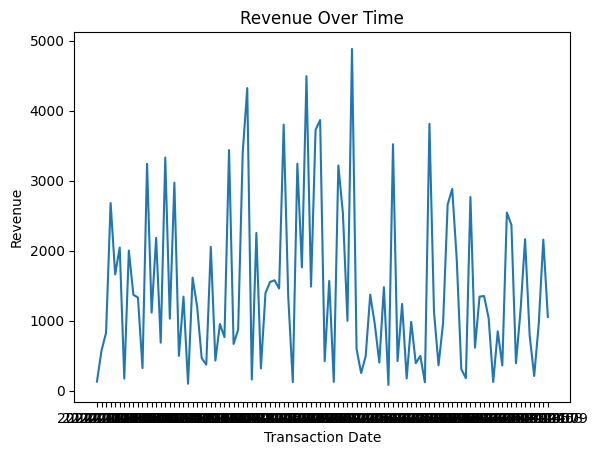

In [46]:
plt.plot(df['TransactionDate'], df['Revenue'])
plt.xlabel('Transaction Date')
plt.ylabel('Revenue')
plt.title('Revenue Over Time')
plt.show()